In [127]:
import pandas as pd
import numpy as np
from scipy.fft import fft, fftfreq, rfft, rfftfreq, ifft, irfft
import matplotlib.pyplot as plt
import math # sqrt for magnitude
%matplotlib inline
all_subjects_csv = pd.read_csv("../Subjects/subjects_csv/all_subjects.csv")

In [2]:
all_subjects_csv

,Subject,0,1,2,3,4,5,6,7,8,...,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312
0,Subject 1,7.28,6.33,5.46,4.60,3.74,2.86,2.03,1.27,0.57,...,32.15,32.15,32.13,32.13,32.13,32.13,32.15,32.15,32.15,49.611369
1,Subject 1,6.34,9.78,12.97,15.82,18.17,19.99,21.33,22.39,23.37,...,32.15,32.15,32.16,32.16,32.16,32.16,32.15,32.15,32.15,50.323992
2,Subject 1,7.70,6.02,4.23,2.46,0.74,-0.93,-2.62,-4.36,-6.16,...,32.15,32.15,32.15,32.15,32.15,32.15,32.13,32.13,32.13,52.708336
3,Subject 1,-120.35,-108.51,-98.97,-91.45,-84.97,-78.29,-70.36,-60.68,-49.41,...,32.13,32.13,32.15,32.15,32.15,32.15,32.13,32.13,32.13,55.640794
4,Subject 1,-7.06,-10.67,-14.96,-19.60,-24.25,-28.65,-32.73,-36.59,-40.43,...,32.13,32.13,32.13,32.13,32.13,32.13,32.15,32.15,32.15,57.658406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64742,Subject 15,24.22,23.34,22.43,21.48,20.36,19.04,17.55,16.05,14.67,...,34.00,33.99,33.99,33.99,33.99,33.99,33.99,33.99,33.99,80.853007
64743,Subject 15,-35.83,-38.20,-39.20,-38.33,-35.31,-30.30,-23.76,-16.46,-9.23,...,33.99,33.99,33.99,33.99,33.99,NaN,NaN,NaN,NaN,NaN
64744,Subject 15,2.07,1.52,0.42,-0.96,-2.35,-3.55,-4.53,-5.45,-6.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64745,Subject 15,15.63,14.74,13.91,12.97,11.83,10.51,9.09,7.69,6.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ppg_graph = all_subjects_csv.iloc[0, 1:513] # get the first 8 second ppg samples
ppg_graph

0      7.28
1      6.33
2      5.46
3       4.6
4      3.74
       ... 
507    3.77
508    1.43
509   -0.45
510    -2.2
511   -4.28
Name: 0, Length: 512, dtype: object

### Data visualization, FFT and z-normalisation

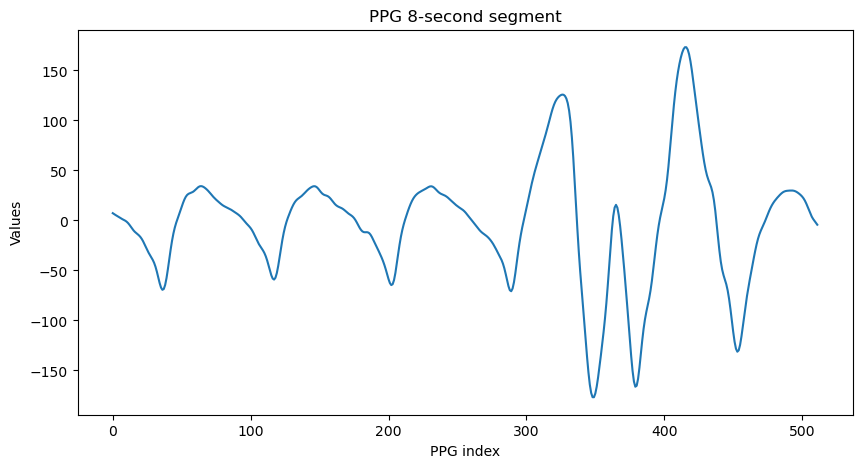

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10,5)) # graphing samples
ppg_graph.plot()
plt.title('PPG 8-second segment')
ax.set_xlabel('PPG index')
ax.set_ylabel('Values')
ax.tick_params('x')
plt.savefig('../media/8_second_segment.png')

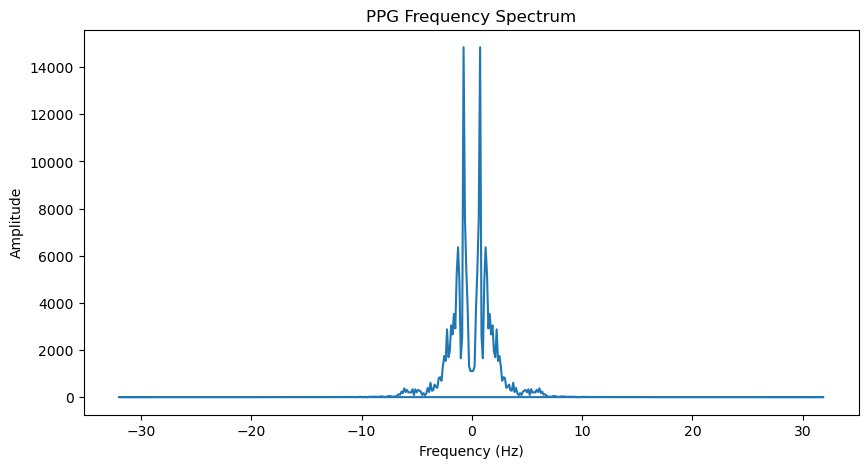

In [6]:
np_ppg_arr = np.array(ppg_graph) # converted to numpy array to work with the fft function
SAMPLE_RATE = 64  # Hertz, sampling rate of the ppg sensor
DURATION = 8  # Seconds that we segmented
N = len(np_ppg_arr) # number of samples in 8 seconds

# fft() calculates the transform itself.
# fftfreq() calculates the frequencies in the center of each bin in the output of fft(). Without this, there would be no way to plot the x-axis on your frequency spectrum.
ppg_fft = fft(np_ppg_arr) # fast fourier transform 
ppg_freq = fftfreq(N, 1/SAMPLE_RATE) # fast Fourier Transform sample frequencies

plt.figure(figsize=(10, 5))
plt.plot(ppg_freq, np.abs(ppg_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('PPG Frequency Spectrum')
plt.savefig('../media/ppg_freq_spectrum_orig.png')
plt.show()

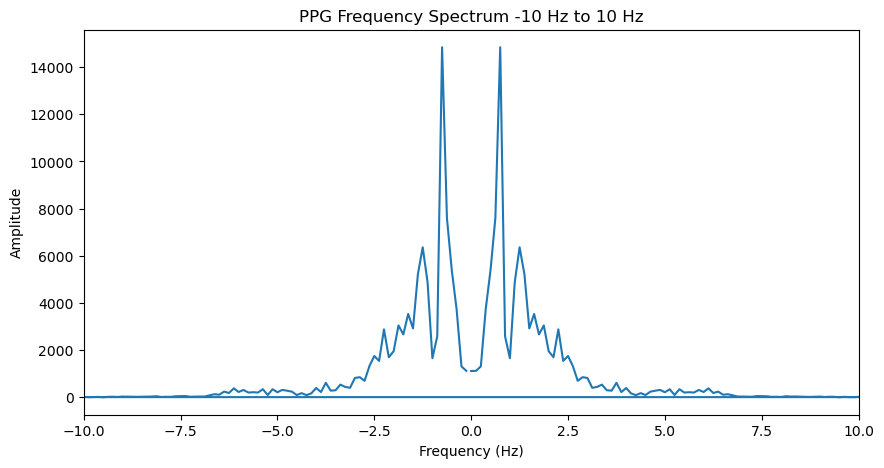

In [7]:
# Plot with range between -10 and 10 for better visualization of relevant data  
plt.figure(figsize=(10, 5))
plt.plot(ppg_freq, np.abs(ppg_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-10, 10) # to zoom in
plt.title('PPG Frequency Spectrum -10 Hz to 10 Hz')
plt.savefig('../media/ppg_freq_spectrum_orig.png')
plt.show()

# It's possible to check how this graph has more in depth of the data distribution when compared to the last one
# However, the important high peaks of amplitude are more centered between -2.5 Hz and 2.5 Hz 

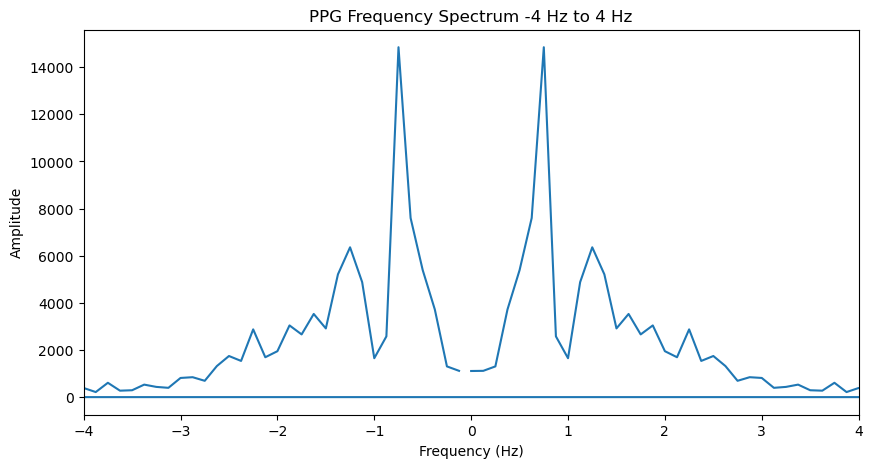

In [8]:
# Plot with range between -4 and 4 for better visualization of relevant data  
plt.figure(figsize=(10, 5))
plt.plot(ppg_freq, np.abs(ppg_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-4, 4)
plt.title('PPG Frequency Spectrum -4 Hz to 4 Hz')
plt.savefig('../media/ppg_freq_spectrum_orig.png')
plt.show()

# This plot represents the important data of the frequency spectrum. It's observed how there's a really high peak at the beginning and 
# declining peaks when moving away from the beginning 

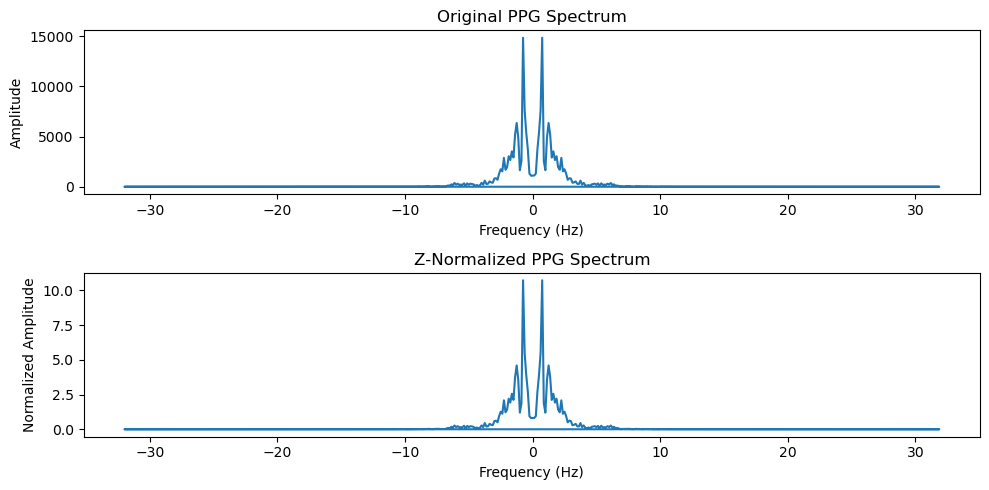

In [9]:
ppg_mean = np.mean(ppg_fft) # mean
ppg_std = np.std(ppg_fft) # standard deviation
ppg_normalized = (ppg_fft - ppg_mean) / ppg_std # z normalisation

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(ppg_freq, np.abs(ppg_fft)) 
plt.title('Original PPG Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(ppg_freq, np.abs(ppg_normalized)) 
plt.title('Z-Normalized PPG Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Normalized Amplitude')

plt.tight_layout()
plt.savefig('../media/ppg_freq_spectrum_orig_normalised.png')
plt.show()

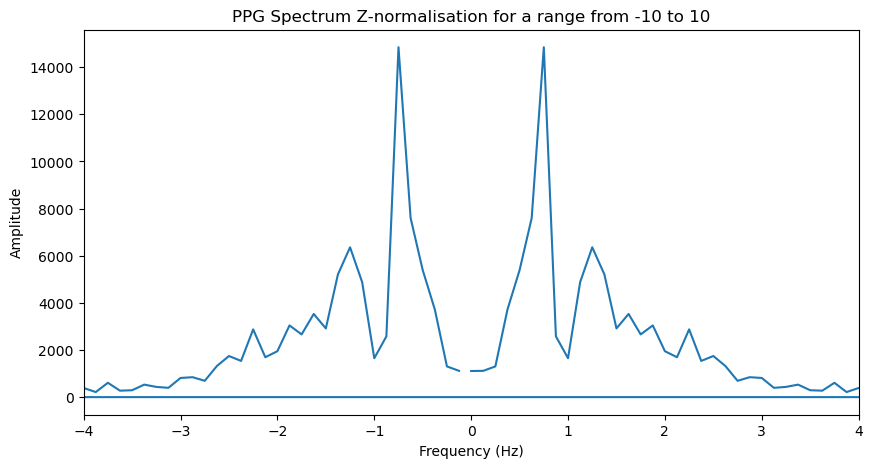

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(ppg_freq, np.abs(ppg_fft)) 
plt.title('PPG Spectrum Z-normalisation for a range from -10 to 10')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-4,4);

In [11]:
# Checking if the z normalisation worked
mean_normalized = np.mean(ppg_normalized) # mean should be 0 
std_normalized = np.std(ppg_normalized) # standard deviation should be 1
mean_normalized, std_normalized

((2.8189256484623115e-18-6.5052130349130266e-18j), 1.0)

## Checking some data correlation

In [13]:
# Create a new DF containing ppg heart rate and frequency values to visualize it
df_graph = pd.DataFrame({'frequency': ppg_freq, 'heartrate': ppg_graph})

In [14]:
len(ppg_graph), len(ppg_freq)

(512, 512)

In [15]:
df_graph

,frequency,heartrate
0,0.000,7.28
1,0.125,6.33
2,0.250,5.46
3,0.375,4.6
4,0.500,3.74
...,...,...
507,-0.625,3.77
508,-0.500,1.43
509,-0.375,-0.45
510,-0.250,-2.2


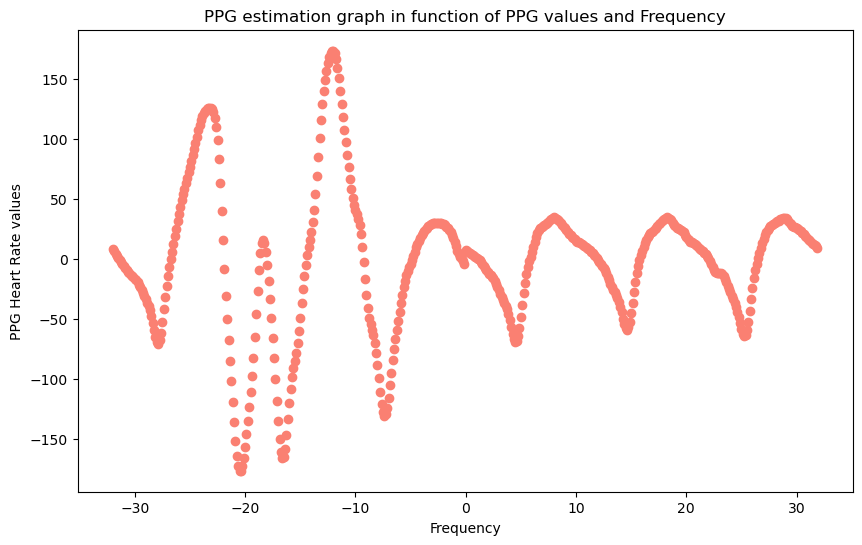

In [16]:
# Heartrate per Frequency
plt.figure(figsize=(10,6))

# Scatter plot
plt.scatter(ppg_freq, # discrete variable
            ppg_graph,  # continuous variable
            c="salmon");

# helpful info
plt.title("PPG estimation graph in function of PPG values and Frequency")
plt.xlabel("Frequency")
plt.ylabel("PPG Heart Rate values");

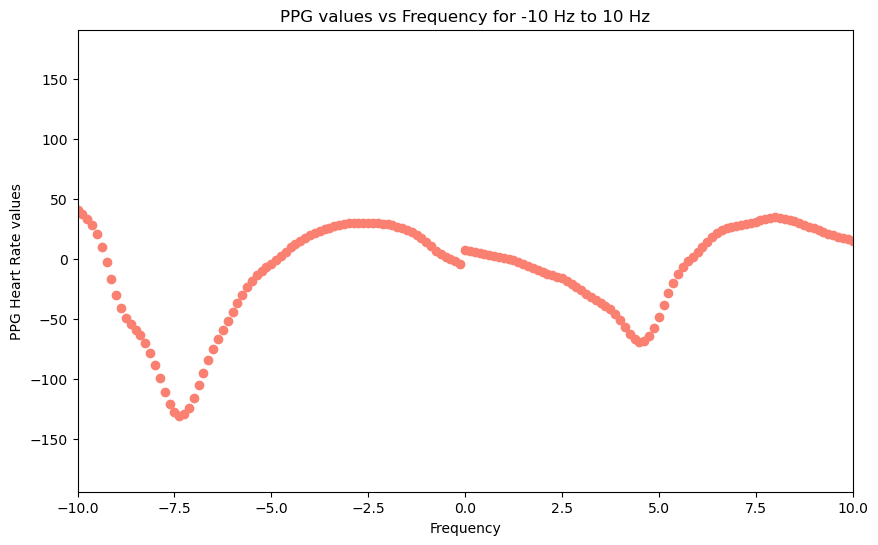

In [17]:
plt.figure(figsize=(10,6))

# Scatter plot
plt.scatter(ppg_freq, # discrete variable
            ppg_graph,  # continuous variable
            c="salmon");

# Add some helpful info
plt.title("PPG values vs Frequency for -10 Hz to 10 Hz")
plt.xlabel("Frequency")
plt.ylabel("PPG Heart Rate values")
plt.xlim(-10,10);

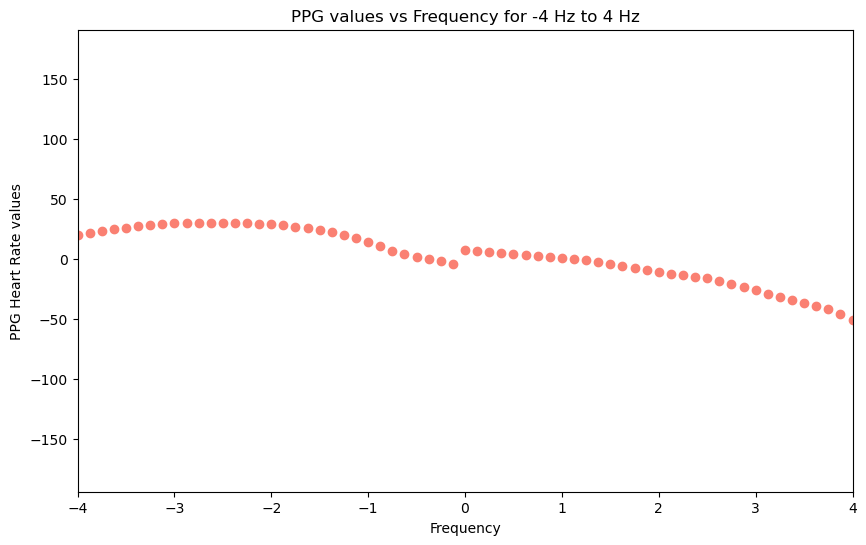

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(ppg_freq, # discrete variable
            ppg_graph,  # continuous variable
            c="salmon");

# Add some helpful info
plt.title("PPG values vs Frequency for -4 Hz to 4 Hz")
plt.xlabel("Frequency")
plt.ylabel("PPG Heart Rate values")
plt.xlim(-4,4);

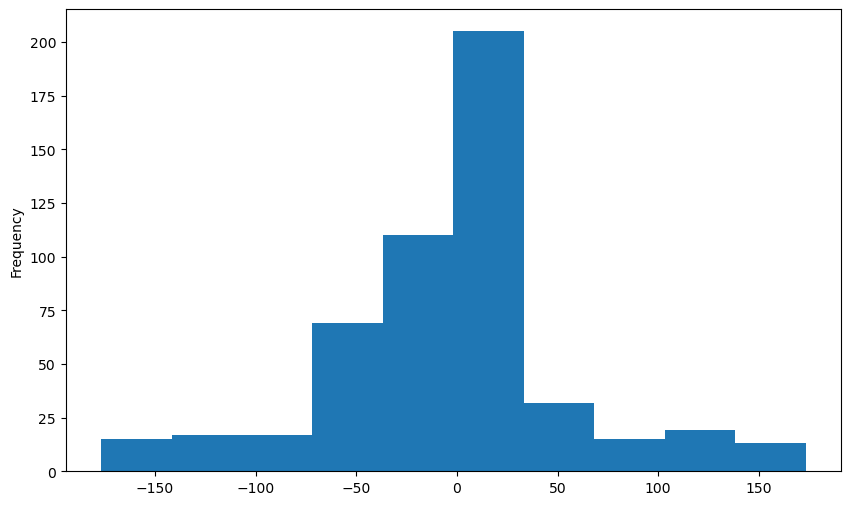

In [19]:
# hist plot
# Heartrate with Frequency
# Create another figure
plt.figure(figsize=(10,6))

# Scatter plot
# show the columns with target equals 1
# Check the distribution of the age column with a histogram
ppg_graph.plot.hist();
# we can see that it's a normal distribution (Gaussian)

## Limiting the data range and analysing it

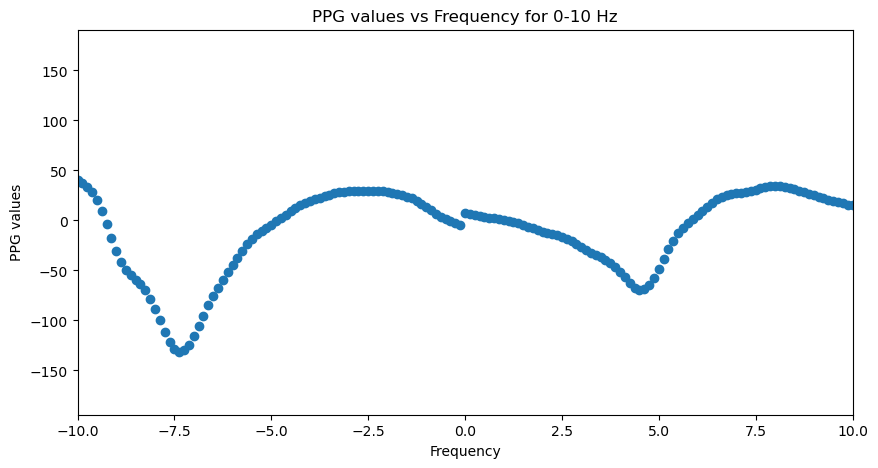

In [21]:
plt.figure(figsize=(10,5))

plt.scatter(ppg_freq, ppg_graph)
plt.xlabel('Frequency')
plt.ylabel('PPG values')
plt.title('PPG values vs Frequency for 0-10 Hz')
plt.xlim(-10,10);

In [22]:
df_graph

,frequency,heartrate
0,0.000,7.28
1,0.125,6.33
2,0.250,5.46
3,0.375,4.6
4,0.500,3.74
...,...,...
507,-0.625,3.77
508,-0.500,1.43
509,-0.375,-0.45
510,-0.250,-2.2


In [23]:
df_graph[(df_graph['frequency'] >= -10)]

,frequency,heartrate
0,0.000,7.28
1,0.125,6.33
2,0.250,5.46
3,0.375,4.6
4,0.500,3.74
...,...,...
507,-0.625,3.77
508,-0.500,1.43
509,-0.375,-0.45
510,-0.250,-2.2


In [24]:
df_graph[(df_graph['frequency'] <= 10)]

,frequency,heartrate
0,0.000,7.28
1,0.125,6.33
2,0.250,5.46
3,0.375,4.6
4,0.500,3.74
...,...,...
507,-0.625,3.77
508,-0.500,1.43
509,-0.375,-0.45
510,-0.250,-2.2


In [25]:
filtered_df = df_graph[(df_graph['frequency'] >= -10) & (df_graph['frequency'] <= 10)]

In [26]:
filtered_df

,frequency,heartrate
0,0.000,7.28
1,0.125,6.33
2,0.250,5.46
3,0.375,4.6
4,0.500,3.74
...,...,...
507,-0.625,3.77
508,-0.500,1.43
509,-0.375,-0.45
510,-0.250,-2.2


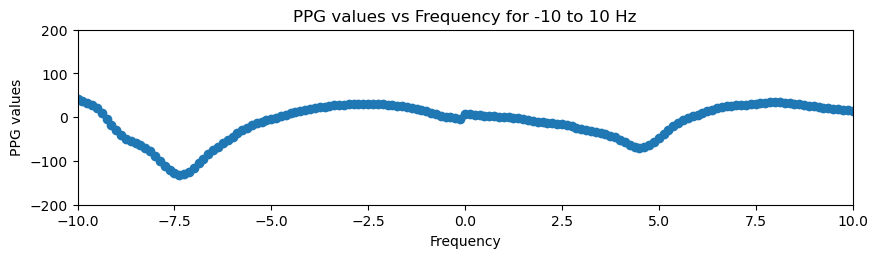

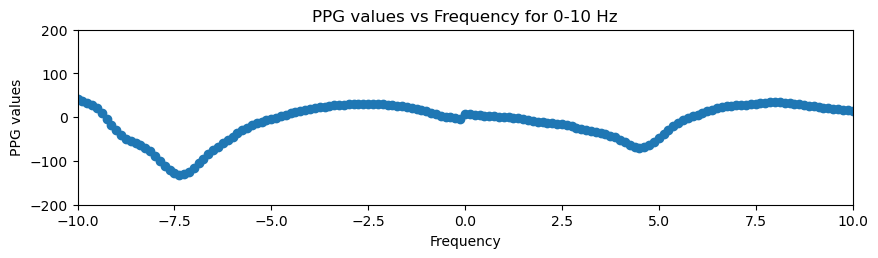

In [27]:
# Plotting the filtered values
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.scatter(filtered_df['frequency'], filtered_df['heartrate'])
plt.xlabel('Frequency')
plt.ylabel('PPG values')
plt.title('PPG values vs Frequency for -10 to 10 Hz')
plt.xlim(-10, 10)
plt.ylim(-200, 200);
plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 2)
plt.scatter(ppg_freq, ppg_graph)
plt.xlabel('Frequency')
plt.ylabel('PPG values')
plt.title('PPG values vs Frequency for 0-10 Hz')
plt.xlim(-10,10)
plt.ylim(-200, 200)
plt.show()

### Filtering to 0-4 Hz and transforming it back to the time domain using real Fast Fourier Transform (rFFT)

Source: https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html 

In [29]:
# Trying to apply the FFT and transform it back to the time domain

np_ppg_arr = np.array(ppg_graph) # converted to numpy array to work with the fft function
SAMPLE_RATE = 64  # Hertz, sampling rate of the ppg sensor
DURATION = 8  # Seconds that we segmented
N = len(np_ppg_arr) # number of samples in 8 seconds

# fft() calculates the transform itself.
# fftfreq() calculates the frequencies in the center of each bin in the output of fft(). Without this, there would be no way to plot the x-axis on your frequency spectrum.
ppg_fft = fft(np_ppg_arr) # fast fourier transform 
ppg_freq = fftfreq(N, 1/SAMPLE_RATE) # fast Fourier Transform sample frequencies

In [30]:
new_sign = ifft(filtered_df['heartrate']) # for some reason I can't transform it back to the time domain using FFT
new_sign; # the array values still are in rectangular form ([real numbers] + j*[complex numbers])

(0.0, 10.0)

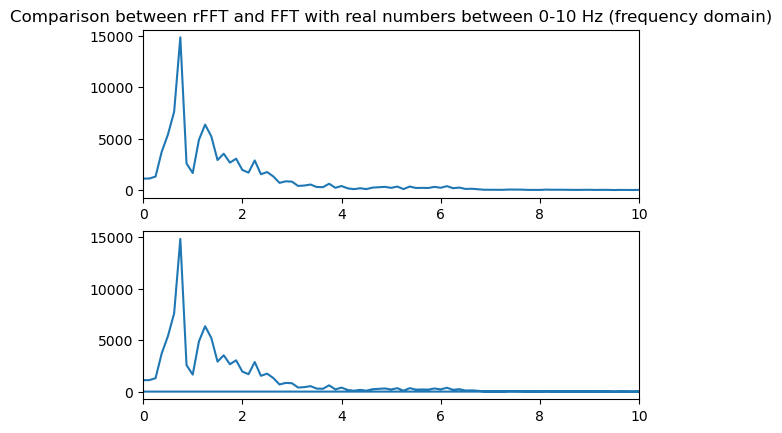

In [31]:
# creating a real Fast Fourier Transform (rFFT) - I only found a way to invert back to time domain with rFFT and not with normal FFT 
# (which in the end doesn't change much cause our dataset has only real values)
new_ppg_rfft = rfft(np_ppg_arr) # rFFT
new_ppg_rfreq = rfftfreq(N, 1/SAMPLE_RATE) # frequency for rFFT

# Comparing and checking if the rFFT and FFT are the same. Note: since rFFT is for real values, then I had to discard the negative part of the normal FFT graph 
plt.subplot(2,1,1)
plt.title('Comparison between rFFT and FFT with real numbers between 0-10 Hz (frequency domain)')
plt.plot(new_ppg_rfreq, np.abs(new_ppg_rfft))
plt.xlim(0, 10)
plt.subplot(2,1,2)
plt.plot(ppg_freq, np.abs(ppg_fft))
plt.xlim(0, 10)

In [32]:
df_rfft = pd.DataFrame({'frequency': new_ppg_rfreq, 'heartrate': new_ppg_rfft}) # creating a new df for the rFFT
df_rfft

,frequency,heartrate
0,0.000,-1114.000000+ 0.000000j
1,0.125,-353.292892-1063.586962j
2,0.250,977.601574+ 870.089095j
3,0.375,-3034.880096+2155.066282j
4,0.500,-2323.184280-4865.794460j
...,...,...
252,31.500,6.585810- 0.160211j
253,31.625,6.754722- 0.127148j
254,31.750,6.630354- 0.094417j
255,31.875,6.711343- 0.036017j


In [33]:
df_rfft_filtered = df_rfft[df_rfft['frequency'] <= 4] # filtering the spectrum to only the frequency range 0-4 Hz
df_rfft_filtered;

(0.0, 4.0)

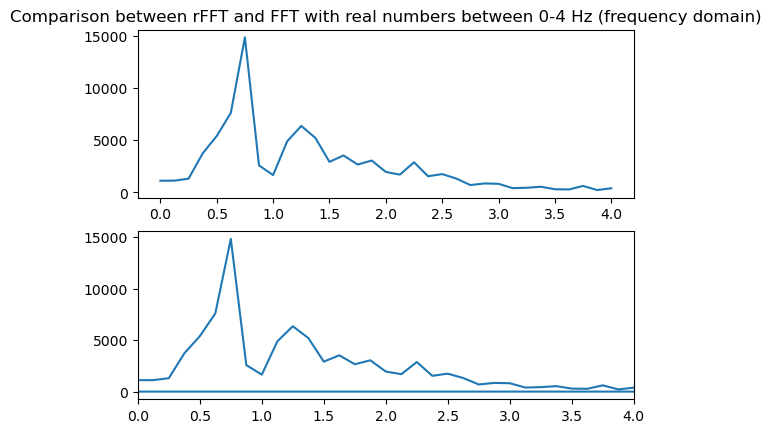

In [34]:
# Comparing the new filtered graph (from the rFFT dataframe) with the original graph (ppg_fft) for a 0-4 Hz range
plt.subplot(2,1,1)
plt.title('Comparison between rFFT and FFT with real numbers between 0-4 Hz (frequency domain)')
plt.plot(df_rfft_filtered['frequency'], np.abs(df_rfft_filtered['heartrate']))
plt.subplot(2,1,2)
plt.plot(ppg_freq, np.abs(ppg_fft))
plt.xlim(0,4)

In [35]:
# Transforming it back from the rFFT (frequency domain) to the time domain
rfft_filt = np.array(df_rfft_filtered['heartrate'])
new_ppg_sign = irfft(rfft_filt)
new_ppg_sign # now it's notable how the array has only real numbers (and not complex numbers like it happened with FFT)

array([    7.17717254,    21.85911507,  -101.54239547,  -185.19807396,
        -452.02153919,  -385.45853871,    68.99551966,   210.9553546 ,
         271.78045409,   202.52559931,   118.88615526,    74.58485222,
         -15.38830722,  -127.04179878,  -355.27318216,  -352.1229702 ,
          66.62770795,   180.36516027,   270.14114   ,   221.27552065,
         150.85268079,    77.31040519,     1.46967347,  -109.32798025,
        -202.25896205,  -475.11180111,  -229.63074177,   148.0880004 ,
         229.3982839 ,   270.45940515,   195.02530743,   143.46453749,
          50.41505128,   -40.21534171,  -146.64619585,  -261.01905324,
        -524.04653822,  -144.96105418,   300.00030066,   621.66670084,
         904.59167716,  1011.43955992,   161.37673748, -1118.2285748 ,
       -1286.86774057,  -337.09503796,   -15.81374357, -1096.23742139,
       -1032.54747709,  -349.38432561,   192.33345116,   996.31270258,
        1390.03822484,   856.5679169 ,   325.25079158,  -165.77736198,
      

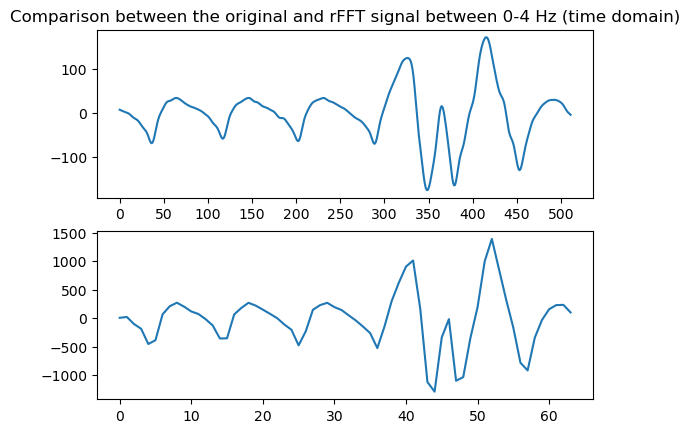

In [36]:
plt.subplot(2,1,1)
plt.title('Comparison between the original and rFFT signal between 0-4 Hz (time domain)')
plt.plot(ppg_graph)  # plot of the original signal
plt.xticks(np.arange(0, 512, 50))
plt.subplot(2,1,2)
plt.plot(new_ppg_sign) # plot of the signal filtered for 0-4 Hz using rFFT
plt.show()

### Plotting different heart rates signals

In [38]:
all_subjects_csv.head(10)

,Subject,0,1,2,3,4,5,6,7,8,...,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312
0,Subject 1,7.28,6.33,5.46,4.60,3.74,2.86,2.03,1.27,0.57,...,32.15,32.15,32.13,32.13,32.13,32.13,32.15,32.15,32.15,49.611369
1,Subject 1,6.34,9.78,12.97,15.82,18.17,19.99,21.33,22.39,23.37,...,32.15,32.15,32.16,32.16,32.16,32.16,32.15,32.15,32.15,50.323992
2,Subject 1,7.70,6.02,4.23,2.46,0.74,-0.93,-2.62,-4.36,-6.16,...,32.15,32.15,32.15,32.15,32.15,32.15,32.13,32.13,32.13,52.708336
3,Subject 1,-120.35,-108.51,-98.97,-91.45,-84.97,-78.29,-70.36,-60.68,-49.41,...,32.13,32.13,32.15,32.15,32.15,32.15,32.13,32.13,32.13,55.640794
4,Subject 1,-7.06,-10.67,-14.96,-19.60,-24.25,-28.65,-32.73,-36.59,-40.43,...,32.13,32.13,32.13,32.13,32.13,32.13,32.15,32.15,32.15,57.658406
5,Subject 1,39.96,38.96,37.78,36.37,34.70,32.84,30.87,28.90,27.01,...,32.15,32.15,32.13,32.13,32.13,32.13,32.15,32.15,32.15,58.911550
6,Subject 1,87.64,86.60,84.92,82.27,78.56,73.88,68.48,62.64,56.62,...,32.15,32.15,32.15,32.15,32.15,32.15,32.15,32.15,32.15,57.976459
7,Subject 1,-101.46,-85.68,-69.78,-53.39,-36.17,-18.03,0.67,19.17,36.49,...,32.15,32.15,32.15,32.15,32.15,32.15,32.13,32.13,32.13,58.676292
8,Subject 1,83.63,46.20,11.78,-18.33,-43.42,-63.41,-78.67,-89.85,-97.59,...,32.13,32.13,32.13,32.13,32.13,32.13,32.15,32.15,32.15,62.350800
9,Subject 1,-7.41,3.89,14.59,24.58,33.77,42.02,49.33,55.77,61.46,...,32.15,32.15,32.11,32.11,32.11,32.11,32.11,32.11,32.11,69.113975


In [39]:
# 8-second segments of subject 1
ppg_first_segment = all_subjects_csv.iloc[0, 1:513]
ppg_second_segment = all_subjects_csv.iloc[1, 1:513]
ppg_third_segment = all_subjects_csv.iloc[2, 1:513]
ppg_tenth_segment = all_subjects_csv.iloc[9, 1:513]
ppg_fifteenth_segment = all_subjects_csv.iloc[15, 1:513]
# print(second_segment)

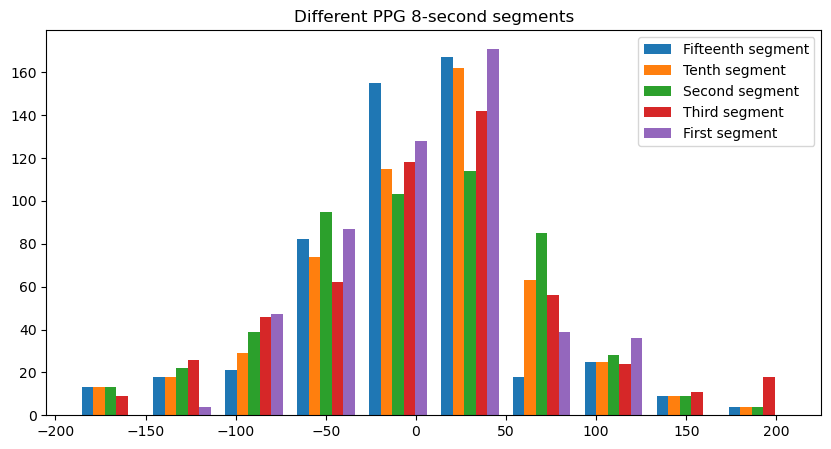

In [40]:
ppg_segments = [ppg_first_segment, ppg_second_segment, ppg_third_segment, ppg_tenth_segment, ppg_fifteenth_segment]
ppg_segments_legends = {'First segment', 'Second segment', 'Third segment', 'Tenth segment', 'Fifteenth segment'}
plt.figure(figsize=(10,5))
plt.hist(ppg_segments)
plt.title('Different PPG 8-second segments')
plt.legend(ppg_segments_legends)
plt.show()

In [41]:
np.min(ppg_second_segment), np.min(ppg_tenth_segment), np.max(ppg_second_segment), np.max(ppg_tenth_segment)

(-176.79, -189.51, 173.25, 209.4)

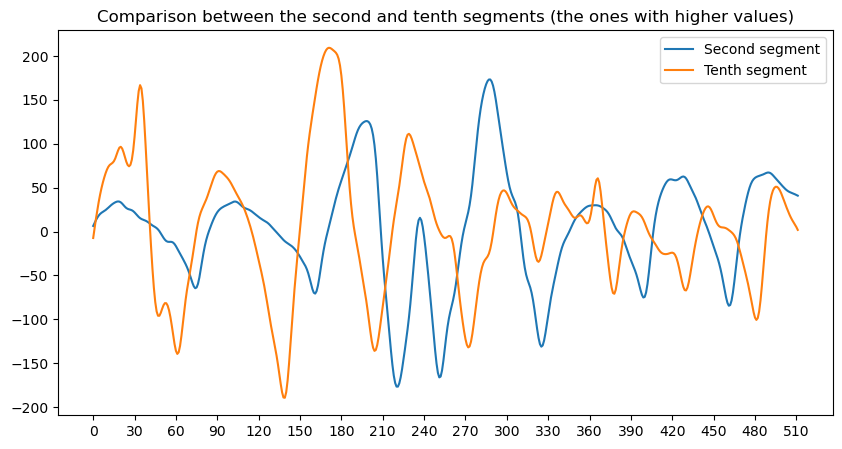

In [42]:
plt.figure(figsize=(10,5))
plt.title('Comparison between the second and tenth segments (the ones with higher values)')
plt.plot(ppg_second_segment)
plt.plot(ppg_tenth_segment)
plt.legend(['Second segment', 'Tenth segment'])
plt.xticks(np.arange(0, 512, 30))
plt.show()

### Different heart rate signals with 0-4 Hz frequency range

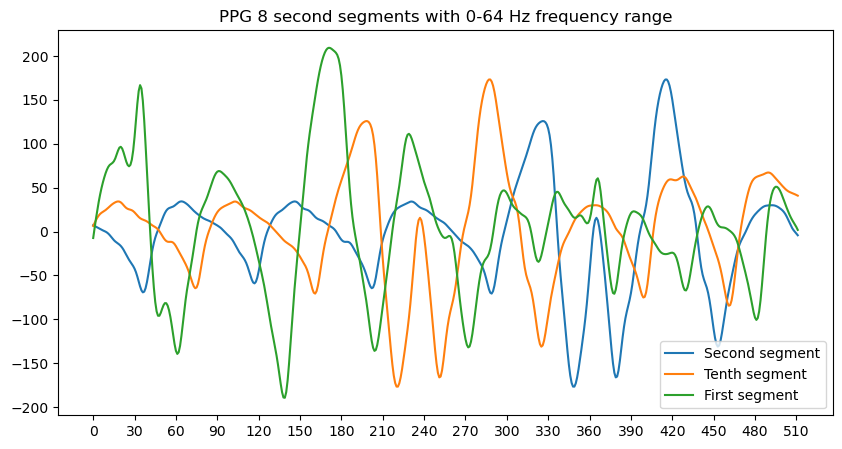

In [59]:
segments_legends = {'First segment','Second segment', 'Tenth segment'}
plt.figure(figsize=(10,5))
plt.title('PPG 8 second segments with 0-64 Hz frequency range')
plt.plot(ppg_first_segment) 
plt.plot(ppg_second_segment) 
plt.plot(ppg_tenth_segment)
plt.legend(segments_legends)
plt.xticks(np.arange(0, 512, 30))
plt.show()

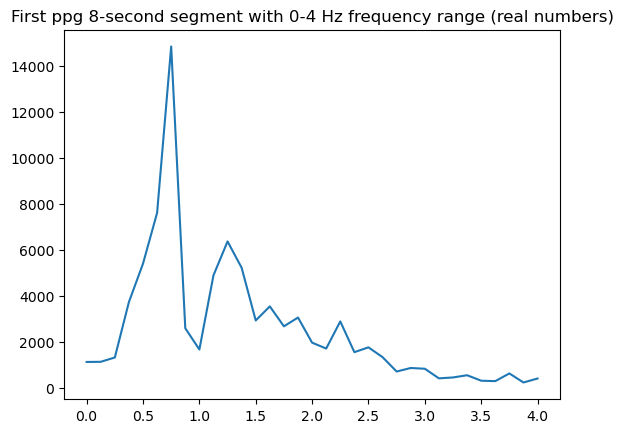

In [61]:
# First ppg 8-second segment 
ppg_first_segment_arr = np.array(ppg_first_segment)

ppg_first_seg_rfft = rfft(ppg_first_segment)
ppg_first_seg_rfftfreq = rfftfreq(N, 1/SAMPLE_RATE)

df_ppg_first_seg_rfft = pd.DataFrame({'frequency': ppg_first_seg_rfftfreq, 'heartrate': ppg_first_seg_rfft}) # creating a new df for the rFFT

df_ppg_first_seg_rfft_filtered = df_ppg_first_seg_rfft[df_ppg_first_seg_rfft['frequency'] <= 4] # filtering the spectrum to only the frequency range 0-4 Hz
plt.plot(df_ppg_first_seg_rfft_filtered['frequency'], np.abs(df_ppg_first_seg_rfft_filtered['heartrate']))
plt.title('First ppg 8-second segment with 0-4 Hz frequency range (real numbers)')
plt.show()
ppg_first_seg_rfft_filt = np.array(df_ppg_first_seg_rfft_filtered['heartrate'])
ppg_first_seg_irfft = irfft(ppg_first_seg_rfft_filt)

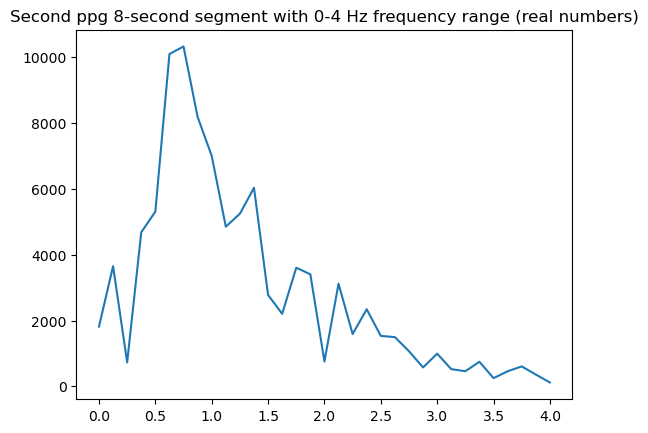

In [63]:
# Second ppg 8-second segment 
ppg_second_segment_arr = np.array(ppg_second_segment)

ppg_second_seg_rfft = rfft(ppg_second_segment)
ppg_second_seg_rfftfreq = rfftfreq(N, 1/SAMPLE_RATE)

df_ppg_second_seg_rfft = pd.DataFrame({'frequency': ppg_second_seg_rfftfreq, 'heartrate': ppg_second_seg_rfft}) # creating a new df for the rFFT

df_ppg_second_seg_rfft_filtered = df_ppg_second_seg_rfft[df_ppg_second_seg_rfft['frequency'] <= 4] # filtering the spectrum to only the frequency range 0-4 Hz
plt.plot(df_ppg_second_seg_rfft_filtered['frequency'], np.abs(df_ppg_second_seg_rfft_filtered['heartrate']))
plt.title('Second ppg 8-second segment with 0-4 Hz frequency range (real numbers)')
plt.show()
ppg_second_seg_rfft_filt = np.array(df_ppg_second_seg_rfft_filtered['heartrate'])
ppg_second_seg_irfft = irfft(ppg_second_seg_rfft_filt)

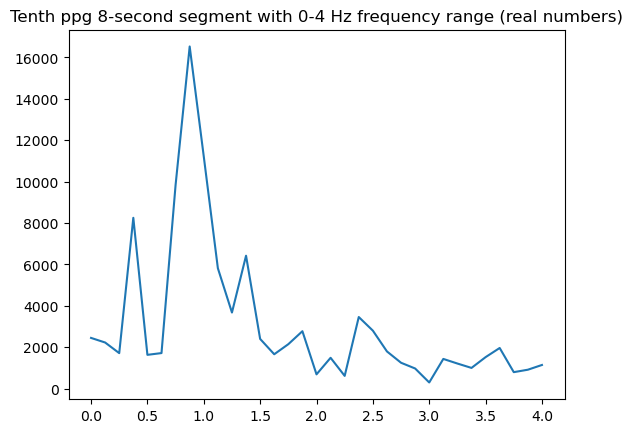

In [65]:
# Tenth ppg 8-second segment 
ppg_tenth_segment_arr = np.array(ppg_tenth_segment)

ppg_tenth_seg_rfft = rfft(ppg_tenth_segment)
ppg_tenth_seg_rfftfreq = rfftfreq(N, 1/SAMPLE_RATE)

df_ppg_tenth_seg_rfft = pd.DataFrame({'frequency': ppg_tenth_seg_rfftfreq, 'heartrate': ppg_tenth_seg_rfft}) # creating a new df for the rFFT

df_ppg_tenth_seg_rfft_filtered = df_ppg_tenth_seg_rfft[df_ppg_tenth_seg_rfft['frequency'] <= 4] # filtering the spectrum to only the frequency range 0-4 Hz
plt.plot(df_ppg_tenth_seg_rfft_filtered['frequency'], np.abs(df_ppg_tenth_seg_rfft_filtered['heartrate']))
plt.title('Tenth ppg 8-second segment with 0-4 Hz frequency range (real numbers)')
plt.show()
ppg_tenth_seg_rfft_filt = np.array(df_ppg_tenth_seg_rfft_filtered['heartrate'])
ppg_tenth_seg_irfft = irfft(ppg_tenth_seg_rfft_filt)

In [108]:
len(df_ppg_tenth_seg_rfft_filtered['heartrate']), len(df_ppg_tenth_seg_rfft_filtered['frequency'])

(33, 33)

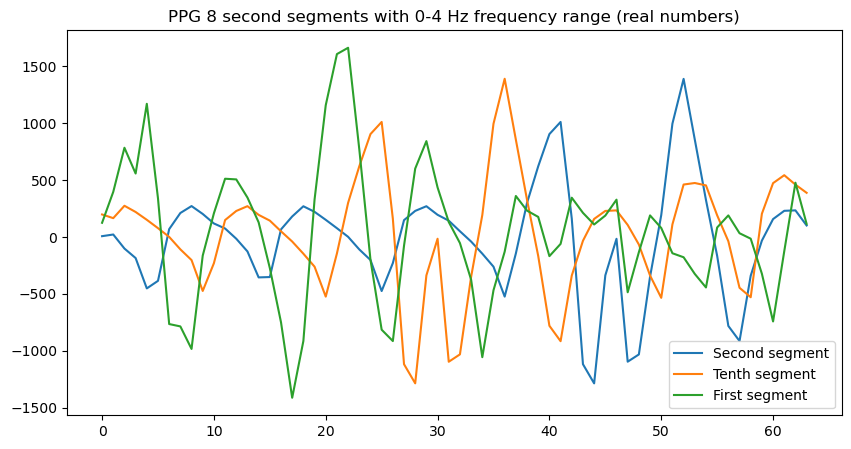

In [67]:
segments_legends = {'First segment','Second segment', 'Tenth segment'}
plt.figure(figsize=(10,5))
plt.title('PPG 8 second segments with 0-4 Hz frequency range (real numbers)')
plt.plot(ppg_first_seg_irfft) 
plt.plot(ppg_second_seg_irfft) 
plt.plot(ppg_tenth_seg_irfft)
plt.legend(segments_legends)
plt.show()

## Correlating PPG FFT values with Accelerometer

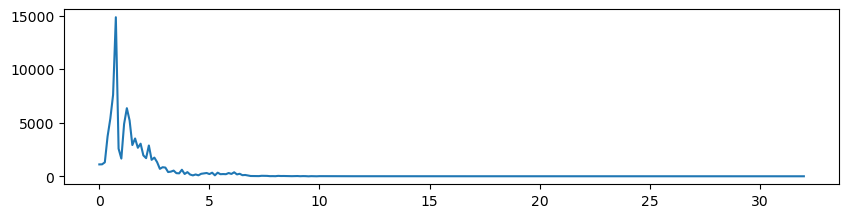

In [70]:
# Getting the fft of the first 8-second segment
ppg_first_segment_arr = np.array(ppg_first_segment)

ppg_first_seg_rfft = rfft(ppg_first_segment)
ppg_first_seg_rfftfreq = rfftfreq(N, 1/SAMPLE_RATE)

plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(ppg_first_seg_rfftfreq, np.abs(ppg_first_seg_rfft))
plt.show()

In [72]:
len(ppg_first_seg_rfft)

257

In [74]:
acc_first_segment = all_subjects_csv.iloc[0, 513:1281] # accelerometer data of the first 8-second segment
# acc_first_segment = all_subjects_csv.iloc[1, 512:1279] # accelerometer data of the second 8-second segment

In [76]:
len(acc_first_segment), acc_first_segment

(768,
 512    -0.765625
 513    -0.078125
 514     0.671875
 515    -0.765625
 516    -0.078125
           ...   
 1275   -0.078125
 1276    0.140625
 1277   -1.015625
 1278   -0.078125
 1279    0.140625
 Name: 0, Length: 768, dtype: object)

In [78]:
acc_first_seg_vector = [] # variable that holds the accelerometer vector sum (x + y + z)
for vector in range(0, len(acc_first_segment), 3):
    acc_first_seg_vector.append(acc_first_segment[vector] + acc_first_segment[vector + 1] + acc_first_segment[vector + 2]) # this is the three channels into one

C:\Users\silva\AppData\Local\Temp\ipykernel_17340\2288929817.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  acc_first_seg_vector.append(acc_first_segment[vector] + acc_first_segment[vector + 1] + acc_first_segment[vector + 2]) # this is the three channels into one


In [80]:
len(acc_first_seg_vector), acc_first_seg_vector[:10]

(256,
 [-0.171875,
  -0.1875,
  -0.171875,
  -0.171875,
  -0.15625,
  -0.15625,
  -0.171875,
  -0.171875,
  -0.171875,
  -0.171875])

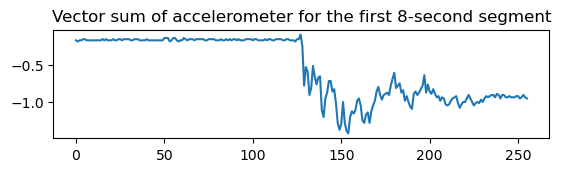

C:\Users\silva\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\silva\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


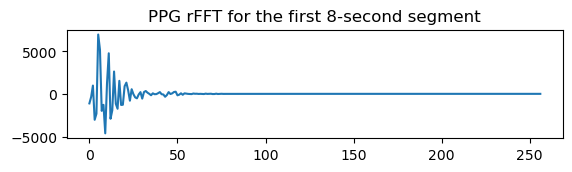

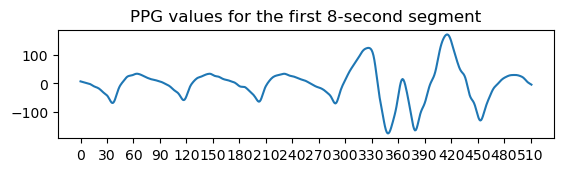

In [82]:
plt.subplot(3,1,1)
plt.title('Vector sum of accelerometer for the first 8-second segment')
plt.plot(acc_first_seg_vector)
plt.show()
plt.subplot(3,1,2)
plt.title('PPG rFFT for the first 8-second segment')
plt.plot(ppg_first_seg_rfft)
plt.show()
plt.subplot(3,1,3)
plt.title('PPG values for the first 8-second segment')
plt.plot(ppg_first_segment)
plt.xticks(np.arange(0, 512, 30))
plt.show()

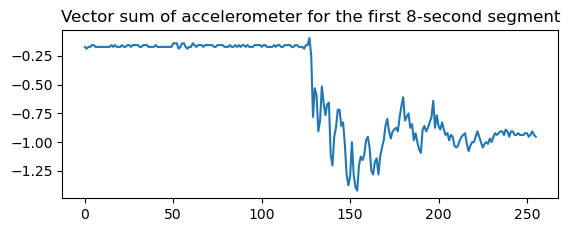

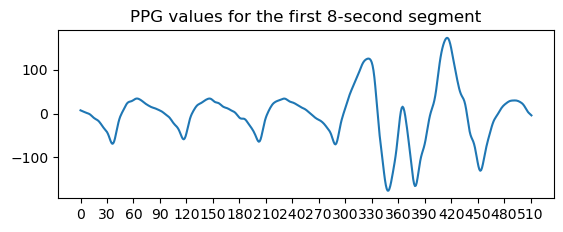

In [83]:
plt.subplot(2,1,1)
plt.title('Vector sum of accelerometer for the first 8-second segment')
plt.plot(acc_first_seg_vector)
plt.show()
plt.subplot(2,1,2)
plt.title('PPG values for the first 8-second segment')
plt.plot(ppg_first_segment)
plt.xticks(np.arange(0, 512, 30))
plt.show()

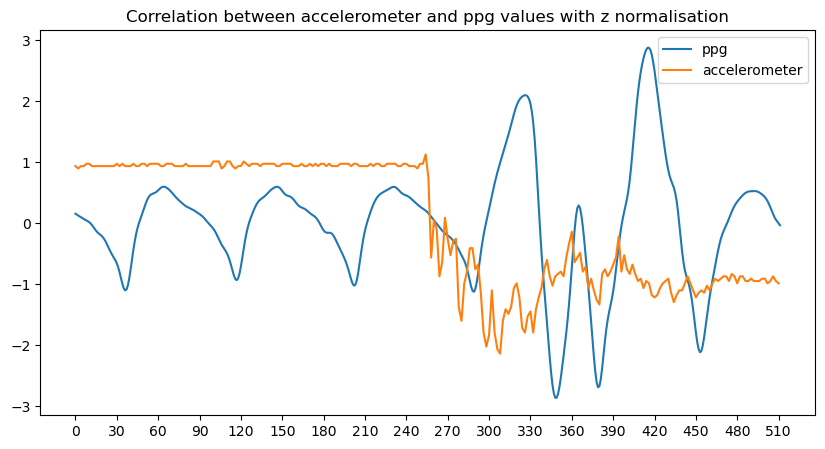

In [96]:
x_acc = np.arange(0, len(ppg_first_segment), 2) # one value of the acc belongs to two values of ppg cuz ppg's len is 512 and acc's len is half of it (256) 

x_acc_mean = np.mean(acc_first_seg_vector) # mean
x_acc_std = np.std(acc_first_seg_vector) # standard deviation
x_acc_normalized = (acc_first_seg_vector - x_acc_mean) / x_acc_std # z normalisation

ppg_first_mean = np.mean(ppg_first_segment) # mean
ppg_first_std = np.std(ppg_first_segment) # standard deviation
ppg_first_normalized = (ppg_first_segment - ppg_first_mean) / ppg_first_std # z normalisation

plt.figure(figsize=(10,5))
plt.title('Correlation between accelerometer and ppg values with z normalisation')
plt.plot(ppg_first_normalized, label='ppg')
plt.plot(x_acc, x_acc_normalized, label='accelerometer')
plt.xticks(np.arange(0,512,30))
plt.legend()
plt.show()

### Visualizing the PPG values and the corresponding label

In [89]:
# Helpful functions

In [303]:
def retrieve_values_display_ppg_label(segment, index):
    """
    Retrieve the label and ppg values of a segment and display the ppg and label values of a segment.
    segment = subject dataframe
    index = index of the 8-second segment
    """
    retrieved_segment = []
    segment_label = segment.iloc[index, -1]
    segment_ppg_values = segment.iloc[index, 1:513]
    segment_acc_values = segment.iloc[index, 513:1281]
    
    x_acc = np.arange(0, len(segment_ppg_values), 2) # one value of the acc belongs to two values of ppg cuz ppg's len is 512 and acc's len is half of it (256) 
    
    acc_first_seg_vector = [] # variable that holds the accelerometer vector sum (x + y + z)
    for vector in range(0, len(segment_acc_values), 3):
        acc_first_seg_vector.append(segment_acc_values[vector] + segment_acc_values[vector + 1] + segment_acc_values[vector + 2]) # this is the three channels into one

    x_acc_mean = np.mean(acc_first_seg_vector) # mean
    x_acc_std = np.std(acc_first_seg_vector) # standard deviation
    x_acc_normalized = (acc_first_seg_vector - x_acc_mean) / x_acc_std # z normalisation

    ppg_first_mean = np.mean(segment_ppg_values) # mean
    ppg_first_std = np.std(segment_ppg_values) # standard deviation
    ppg_first_normalized = (segment_ppg_values - ppg_first_mean) / ppg_first_std # z normalisation
    
    print(len(segment_ppg_values))

    plt.figure(figsize=(10,5))
    plt.title(f"PPG values visualization for index {index} and its label: {segment_label}")
    plt.plot(ppg_first_normalized, label='ppg')
    plt.plot(x_acc, x_acc_normalized, label='accelerometer')
    plt.xticks(np.arange(0, 512, 30))
    plt.legend()
    plt.show()

512


C:\Users\silva\AppData\Local\Temp\ipykernel_17340\2610575728.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  acc_first_seg_vector.append(segment_acc_values[vector] + segment_acc_values[vector + 1] + segment_acc_values[vector + 2]) # this is the three channels into one


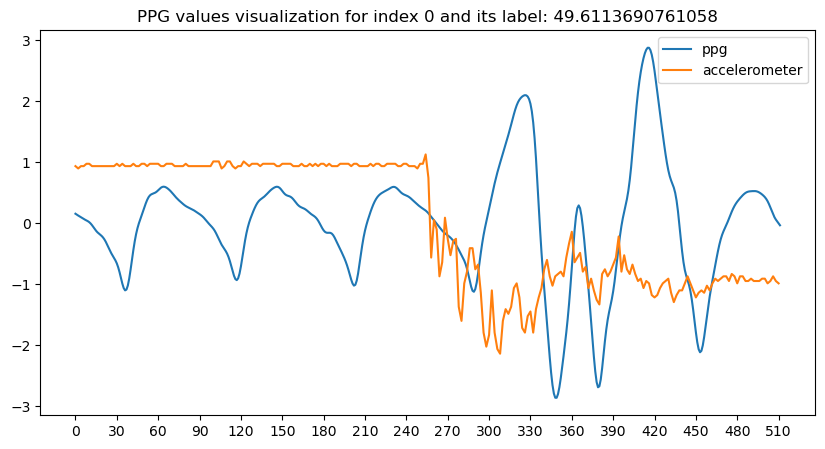

In [305]:
retrieve_values_display_ppg_label(all_subjects_csv, 0)
# retrieve_values_display_ppg_label(all_subjects_csv, 1)
# retrieve_values_display_ppg_label(all_subjects_csv, 2)
# retrieve_values_display_ppg_label(all_subjects_csv, 3)
# retrieve_values_display_ppg_label(all_subjects_csv, 4)
# retrieve_values_display_ppg_label(all_subjects_csv, 10)

## Magnitude of the accelerometer vectors

In [130]:
def magnitude(x, y, z):
    sq = math.sqrt(x**2 + y**2 + z**2)
    return sq
    
print(f'magnitude: {magnitude(3,4,-5)}')

magnitude: 7.0710678118654755


In [378]:
def retrieve_magnitude(segment, index):
    """
    Retrieve the magnitudes of the accelerometer vectors and display them in a line graph.
    segment = subject dataframe
    index = index of the 8-second segment
    """
    retrieved_segment = []
    segment_label = segment.iloc[index, -1]
    segment_ppg_values = segment.iloc[index, 1:513]
    segment_acc_values = segment.iloc[index, 513:1281]
        
    acc_first_seg_vector = [] # variable that holds the accelerometer vector sum (x + y + z)
    for vector in range(0, len(segment_acc_values), 3):
        acc_first_seg_vector.append(magnitude(segment_acc_values[vector], segment_acc_values[vector + 1],segment_acc_values[vector + 2])) # this is the three channels into one
    
    plt.figure(figsize=(10,5))
    plt.title(f"Magnitude of the accelerometer vectors and its label: {segment_label}")
    plt.plot(acc_first_seg_vector, label='magnitude accelerometer')
    plt.legend()
    plt.show()

C:\Users\silva\AppData\Local\Temp\ipykernel_17340\3956994144.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  acc_first_seg_vector.append(magnitude(segment_acc_values[vector], segment_acc_values[vector + 1],segment_acc_values[vector + 2])) # this is the three channels into one


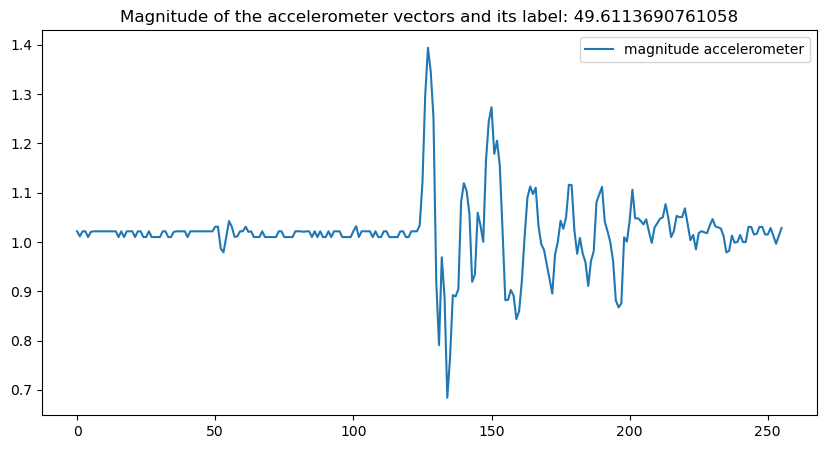

In [380]:
retrieve_magnitude(all_subjects_csv, 0)

In [460]:
def comparison_ppg_mag_acc(segment, index):
    """
    Compare the normalised PPG values and magnitudes of the accelerometer vectors and display them in a line graph.
    segment = subject dataframe
    index = index of the 8-second segment
    """
    retrieved_segment = []
    segment_label = segment.iloc[index, -1]
    segment_ppg_values = segment.iloc[index, 1:513]
    segment_acc_values = segment.iloc[index, 513:1281]
    
    x_acc = np.arange(0, len(segment_ppg_values), 2) # one value of the acc belongs to two values of ppg cuz ppg's len is 512 and acc's len is half of it (256) 
    
    acc_first_seg_vector = [] # variable that holds the accelerometer vector sum (x + y + z)
    for vector in range(0, len(segment_acc_values), 3):
        acc_first_seg_vector.append(magnitude(segment_acc_values[vector], segment_acc_values[vector + 1],segment_acc_values[vector + 2])) # this is the three channels into one

    x_acc_mean = np.mean(acc_first_seg_vector) # mean
    x_acc_std = np.std(acc_first_seg_vector) # standard deviation
    x_acc_normalized = (acc_first_seg_vector - x_acc_mean) / x_acc_std # z normalisation

    ppg_first_mean = np.mean(segment_ppg_values) # mean
    ppg_first_std = np.std(segment_ppg_values) # standard deviation
    ppg_first_normalized = (segment_ppg_values - ppg_first_mean) / ppg_first_std # z normalisation

    plt.figure(figsize=(10,5))
    plt.title(f"Comparison between normalised PPG and magnitude of acc and its label: {segment_label}")
    plt.plot(x_acc, acc_first_seg_vector, label='raw magnitude')
    plt.plot(ppg_first_normalized, label='ppg normalised')
    plt.xticks(np.arange(0, 512, 30))
    plt.legend()
    plt.show()

C:\Users\silva\AppData\Local\Temp\ipykernel_17340\1849053810.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  acc_first_seg_vector.append(magnitude(segment_acc_values[vector], segment_acc_values[vector + 1],segment_acc_values[vector + 2])) # this is the three channels into one


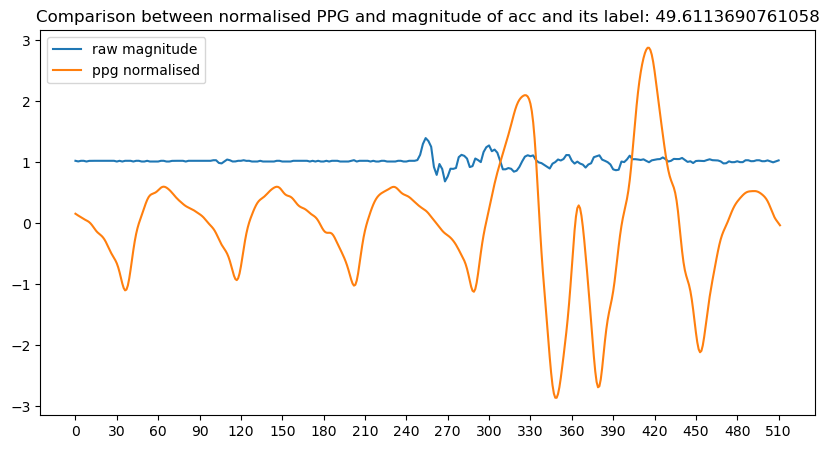

256


In [415]:
comparison_ppg_mag_acc(all_subjects_csv, 0)
# comparison_ppg_mag_acc(all_subjects_csv, 1)
# comparison_ppg_mag_acc(all_subjects_csv, 2)
# comparison_ppg_mag_acc(all_subjects_csv, 3)
# comparison_ppg_mag_acc(all_subjects_csv, 4)
# comparison_ppg_mag_acc(all_subjects_csv, 10)

In [411]:
def retrieve_rfft_acc(segment, index):
    """
    Retrieve the magnitudes of the accelerometer vectors and display them in a line graph.
    segment = subject dataframe
    index = index of the 8-second segment
    """
    retrieved_segment = []
    segment_label = segment.iloc[index, -1]
    segment_ppg_values = segment.iloc[index, 1:513]
    segment_acc_values = segment.iloc[index, 513:1281]

    acc_first_seg_vector = [] # variable that holds the accelerometer vector sum (x + y + z)
    for vector in range(0, len(segment_acc_values), 3):
        acc_first_seg_vector.append(magnitude(segment_acc_values[vector], segment_acc_values[vector + 1],segment_acc_values[vector + 2])) # this is the three channels into one

    SAMPLE_RATE = 32  # Hertz, sampling rate of the acc sensor
    DURATION = 8  # Seconds that we segmented
    N = len(acc_first_seg_vector) # number of samples in 8 seconds
    acc_first_seg_vector_rfft = rfft(acc_first_seg_vector)
    acc_first_seg_vector_rfftfreq = rfftfreq(N, 1/SAMPLE_RATE)
    acc_first_seg_vector_irfft = irfft(acc_first_seg_vector_rfft)


    plt.figure(figsize=(10,5))
    plt.subplot(2,1,1)
    plt.title(f"rFFT of the accelerometer (its magnitude)")
    plt.plot(acc_first_seg_vector_rfftfreq, np.abs(acc_first_seg_vector_rfft))
    plt.show()
    plt.figure(figsize=(10,5))
    plt.subplot(2,1,2)
    plt.title(f"irFFT of the accelerometer (its magnitude)")
    plt.plot(acc_first_seg_vector_irfft)
    plt.show()

C:\Users\silva\AppData\Local\Temp\ipykernel_17340\783556343.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  acc_first_seg_vector.append(magnitude(segment_acc_values[vector], segment_acc_values[vector + 1],segment_acc_values[vector + 2])) # this is the three channels into one


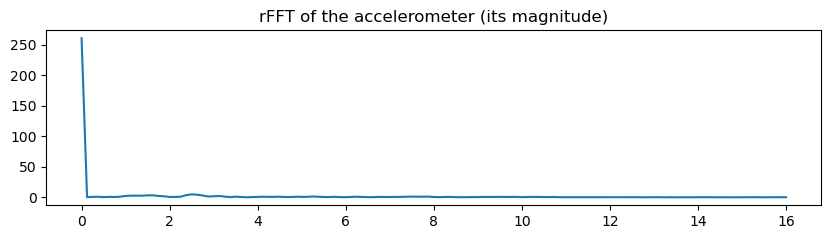

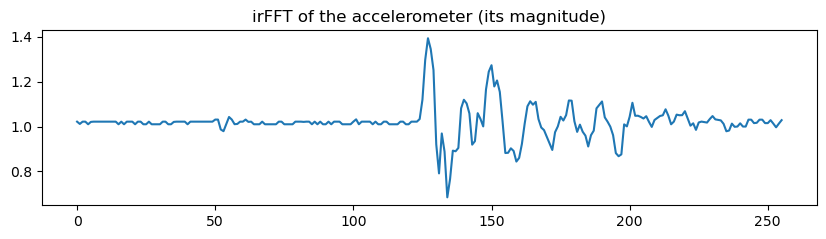

In [413]:
retrieve_rfft_acc(all_subjects_csv, 0)
# retrieve_rfft_acc(all_subjects_csv, 1)
# retrieve_rfft_acc(all_subjects_csv, 2)
# retrieve_rfft_acc(all_subjects_csv, 3)
# retrieve_rfft_acc(all_subjects_csv, 4)
# retrieve_rfft_acc(all_subjects_csv, 10)

In [496]:
def retrieve_mag_filt(segment, index):
    """
    Retrieve the magnitudes of the accelerometer vectors and display them in a line graph.
    segment = subject dataframe
    index = index of the 8-second segment
    """
    retrieved_segment = []
    segment_label = segment.iloc[index, -1]
    segment_ppg_values = segment.iloc[index, 1:513]
    segment_acc_values = segment.iloc[index, 513:1281]
    
    x_acc = np.arange(0, len(segment_ppg_values), 2) # one value of the acc belongs to two values of ppg cuz ppg's len is 512 and acc's len is half of it (256) 
    
    acc_first_seg_vector = [] # variable that holds the accelerometer vector sum (x + y + z)
    for vector in range(0, len(segment_acc_values), 3):
        acc_first_seg_vector.append(magnitude(segment_acc_values[vector], segment_acc_values[vector + 1],segment_acc_values[vector + 2])) # this is the three channels into one

    # print(acc_first_seg_vector)
    SAMPLE_RATE = 32  # Hertz, sampling rate of the acc sensor
    DURATION = 8  # Seconds that we segmented
    N = len(acc_first_seg_vector) # number of samples in 8 seconds
    acc_first_seg_vector_rfft = rfft(acc_first_seg_vector)
    acc_first_seg_vector_rfftfreq = rfftfreq(N, 1/SAMPLE_RATE)
    
    df_acc_seg_rfft = pd.DataFrame({'frequency': acc_first_seg_vector_rfftfreq, 'heartrate': acc_first_seg_vector_rfft}) # creating a new df for the rFFT

    df_acc_seg_rfft_filtered = df_acc_seg_rfft[df_acc_seg_rfft['frequency'] <= 4] # filtering the spectrum to only the frequency range 0-4 Hz
    
    df_acc_seg_arr = np.array(df_acc_seg_rfft_filtered['heartrate'])
    acc_seg_irfft = irfft(df_acc_seg_arr)
    
    
    SAMPLE_RATE = 64  # Hertz, sampling rate of the ppg sensor
    DURATION = 8  # Seconds that we segmented
    N = len(segment_ppg_values) # number of samples in 8 seconds
    ppg_seg_vector_rfft = rfft(segment_ppg_values)
    ppg_seg_vector_rfftfreq = rfftfreq(N, 1/SAMPLE_RATE)
    
    df_ppg_seg_rfft = pd.DataFrame({'frequency': ppg_seg_vector_rfftfreq, 'heartrate': ppg_seg_vector_rfft}) # creating a new df for the rFFT

    df_ppg_seg_rfft_filtered = df_ppg_seg_rfft[df_ppg_seg_rfft['frequency'] <= 4] # filtering the spectrum to only the frequency range 0-4 Hz
    
    df_ppg_seg_arr = np.array(df_ppg_seg_rfft_filtered['heartrate'])
    ppg_seg_irfft = irfft(df_ppg_seg_arr)
    
#     x_acc = np.arange(0, len(segment_ppg_values), 2) # one value of the acc belongs to two values of ppg cuz ppg's len is 512 and acc's len is half of it (256) 
            
    acc_irfft_mean = np.mean(acc_seg_irfft) # mean
    acc_irfft_std = np.std(acc_seg_irfft) # standard deviation
    acc_irfft_normalized = (acc_seg_irfft - acc_irfft_mean) / acc_irfft_std # z normalisation

    ppg_irfft_mean = np.mean(ppg_seg_irfft) # mean
    ppg_irfft_std = np.std(ppg_seg_irfft) # standard deviation
    ppg_irfft_normalized = (ppg_seg_irfft - ppg_irfft_mean) / ppg_irfft_std # z normalisation
    
    ppg_filtered = ppg_irfft_normalized - acc_irfft_normalized
    
    # plt.subplot(5,1,1)
    # plt.title('PPG rFFT')
    # plt.plot(df_ppg_seg_rfft_filtered['frequency'], np.abs(df_ppg_seg_rfft_filtered['heartrate']))
    # plt.show()
    # plt.subplot(5,1,2)
    # plt.title('PPG irFFT')
    # plt.plot(ppg_seg_irfft)
    # plt.show()
    # plt.subplot(5,1,3)
    # plt.plot(df_acc_seg_rfft_filtered['frequency'], np.abs(df_acc_seg_rfft_filtered['heartrate']))
    # plt.title('rFFT Acc')
    # plt.show()
    # plt.subplot(5,1,4)
    # plt.title('irFFT Acc')
    # plt.plot(acc_seg_irfft)
    # plt.show()
    # plt.subplot(5,1,5)
    plt.figure(figsize=(10,5))
    plt.title('irFFT Acc and irFFT PPG')
    # plt.plot(acc_irfft_normalized, label='acc')
    plt.plot(ppg_filtered,  label='ppg')
    plt.legend()
    plt.show()
# retrieve_mag_filt(all_subjects_csv, 0)

C:\Users\silva\AppData\Local\Temp\ipykernel_17340\3542328594.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  acc_first_seg_vector.append(magnitude(segment_acc_values[vector], segment_acc_values[vector + 1],segment_acc_values[vector + 2])) # this is the three channels into one


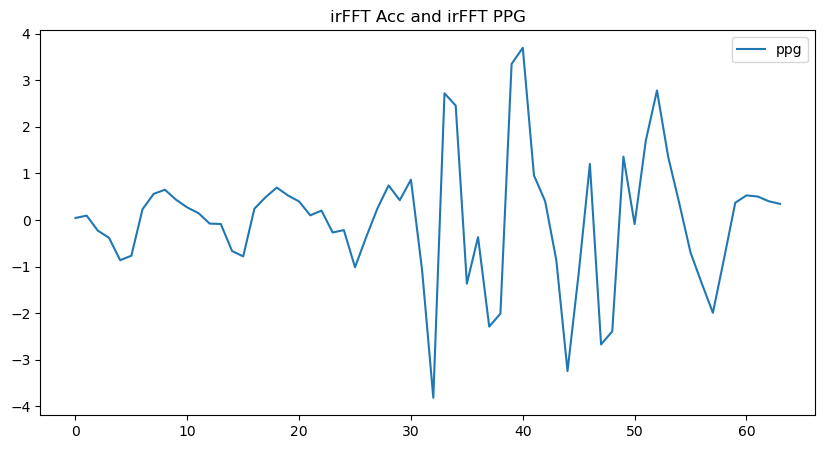

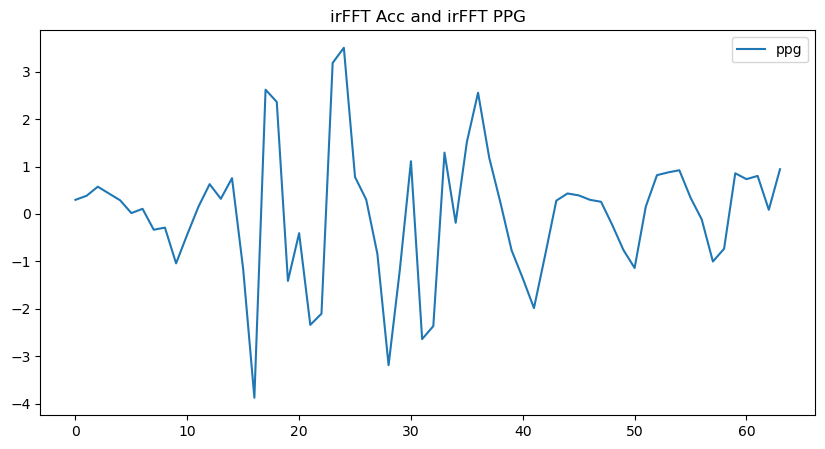

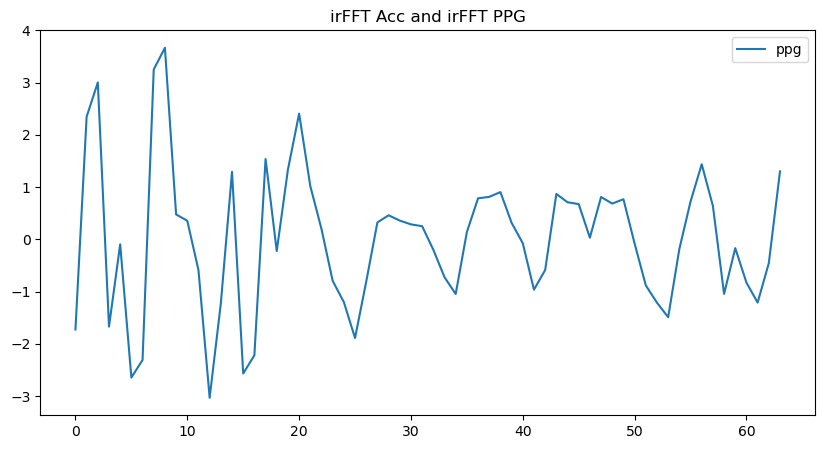

In [498]:
retrieve_mag_filt(all_subjects_csv, 0)
retrieve_mag_filt(all_subjects_csv, 1)
retrieve_mag_filt(all_subjects_csv, 2)